In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from tensorflow import keras

In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
(train_set, train_labels), (test_set, test_labels) = data.load_data()

In [5]:
train_set = train_set/255.0
test_set = test_set/255.0


class mycallback(tf.keras.callbacks.Callback):
    def one_epoch_stop(self, epoch, logs={}):
        if logs.get('Loss') < 0.3:
            print("\nLoss is low, stop training")
            self.model.stop_training = True
callbacks = mycallback()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(126,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
                            ])
                                                     

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_set, train_labels, epochs=20, callbacks=[callbacks])

train_loss, train_acc = model.evaluate(test_set, test_labels)
print(train_loss, train_acc)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6212 - accuracy: 0.7838
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3862 - accuracy: 0.8621
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3438 - accuracy: 0.8716
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8827
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2763 - accuracy: 0.8987
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2713 - accuracy: 0.8976
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2503 - accuracy: 0.9074
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - accuracy: 0.9076
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [9]:
prediction = model.predict(test_set)


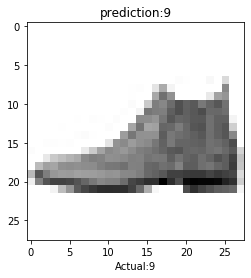

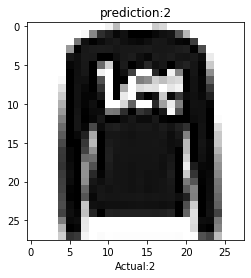

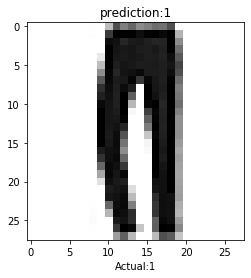

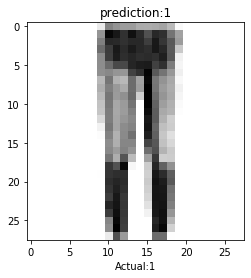

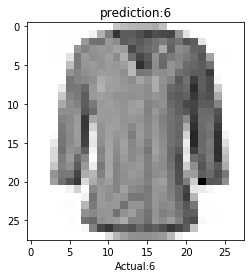

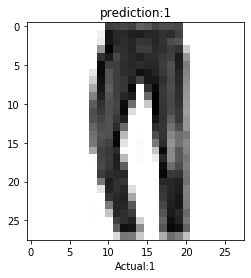

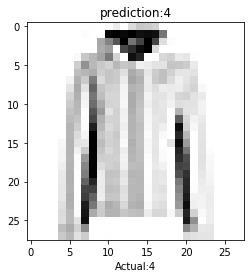

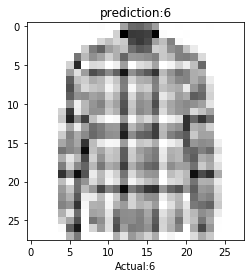

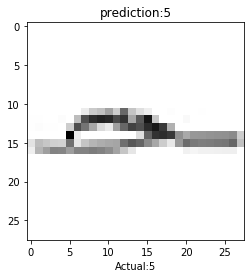

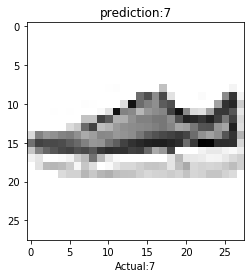

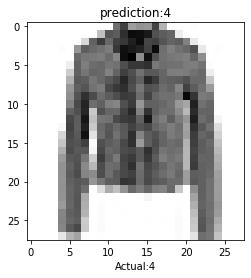

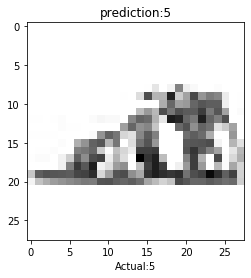

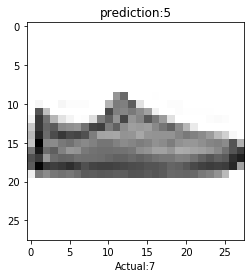

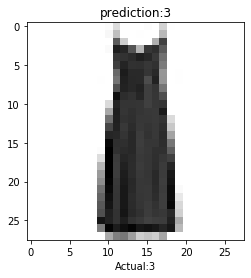

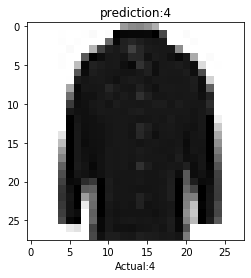

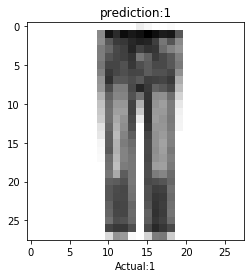

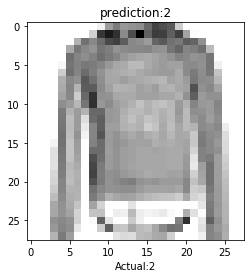

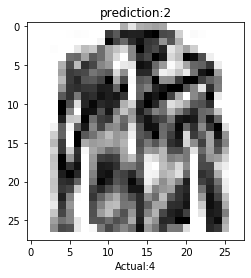

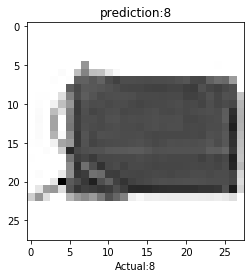

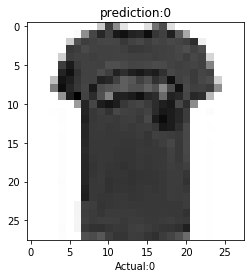

In [10]:
for i in range(20):
    plt.grid(False)
    plt.imshow(test_set[i], cmap=plt.cm.binary)
    plt.xlabel('Actual:' + str(test_labels[i]))
    plt.title('prediction:' + str(np.argmax(prediction[i])))
    plt.show()